# Importing dependencies

In [90]:
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import pandas as pd

In [91]:
#file path for raw data
raw_data_path= 'project_video_folder/'

# Dataset importing

In [92]:
def get_stats(raw_data_path):
    '''
    This function loop through each video folder and
    compile informations about a video such as frame_count, 
    fps, frame_width, frame_height, and video_name
    '''
    frame_count_list=[] #frame_count for each video
    fps_list=[]         #fps for each video
    frame_width_list=[] #frame_width for each video
    frame_height_list=[]#frame_height for each video
    video_name_list=[]  #video_name for each video
    
    #All folder path
    fight_train_data=os.path.join(raw_data_path, 'modelling','train','Fight')
    nonfight_train_data=os.path.join(raw_data_path, 'modelling','train','NonFight')
    fight_val_data=os.path.join(raw_data_path, 'modelling','validation','Fight')
    nonfight_val_data=os.path.join(raw_data_path, 'modelling','validation','NonFight')
    fight_test_data=os.path.join(raw_data_path, 'test','Fight')
    nonfight_test_data=os.path.join(raw_data_path, 'test','NonFight')
    
    path_list=[fight_train_data,nonfight_train_data,fight_val_data,nonfight_val_data,fight_test_data,nonfight_test_data ]
    for path in path_list:
        for video in os.listdir(path):
        
            cap = cv2.VideoCapture(os.path.join(path,video)) #capture video
            
            frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
            fps=int(cap.get(cv2.CAP_PROP_FPS))
            frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
            frame_height=int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
            
            video_name_list.append(video)
            frame_count_list.append(frame_count)
            fps_list.append(fps)
            frame_width_list.append(frame_width)
            frame_height_list.append(frame_height)
            
    df = pd.DataFrame(
            {"video_name" : video_name_list,
             "frame_height" : frame_height_list,
             "frame_width" : frame_width_list,
             "fps" : fps_list,
             "frame_count" : frame_count_list},
              index =np.arange(1,2001,1) )
    
    return df

In [93]:
df=get_stats(raw_data_path)

# Dataset visualization

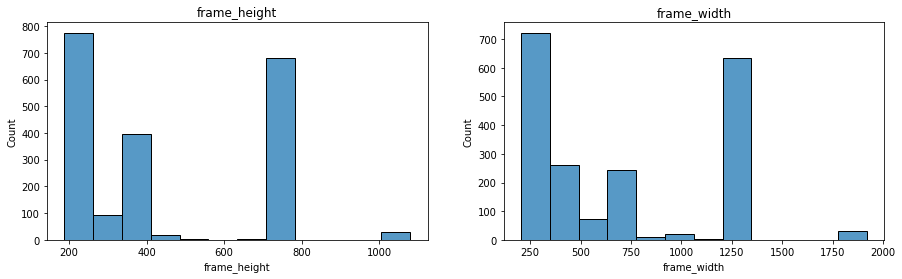

In [94]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
sns.histplot(df, x='frame_height',bins=12, ax=ax1)
ax1.set_title('frame_height')
sns.histplot(df, x='frame_width',bins=12, ax=ax2)
ax2.set_title('frame_width');

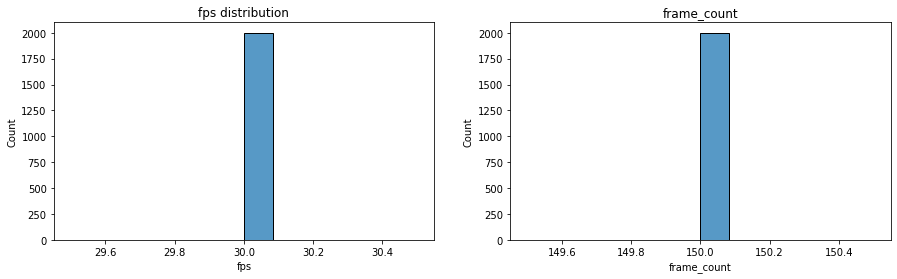

In [95]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
sns.histplot(df, x='fps',bins=12, ax=ax1)
ax1.set_title('fps distribution')
sns.histplot(df, x='frame_count',bins=12, ax=ax2)
ax2.set_title('frame_count');